In [59]:
import numpy as np

In [60]:
import pandas as pd

In [61]:
import os
for dirname, _, filenames in os.walk('./emotions_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./emotions_dataset/train.txt
./emotions_dataset/test.txt
./emotions_dataset/val.txt


In [62]:
df = pd.read_csv("./emotions_dataset/train.txt",sep=";",
    names=["Description","Emotion"])
df.head(5)

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [63]:
df['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [64]:
df['label_num'] = df['Emotion'].map({
    'joy' : 0, 
    'sadness': 1, 
    'anger': 2, 
    'fear': 3,
    'love': 4,
    'surprise':5
})
df.head(5)

,Description,Emotion,label_num
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Description,df.label_num,test_size=0.2)

In [66]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (12800,)
Shape of X_test:  (3200,)


In [67]:
y_train.value_counts()

label_num
0    4271
1    3756
2    1722
3    1539
4    1051
5     461
Name: count, dtype: int64

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      1091
           1       0.68      0.81      0.74       910
           2       0.75      0.55      0.63       437
           3       0.77      0.53      0.62       398
           4       0.71      0.36      0.47       253
           5       0.62      0.32      0.42       111

    accuracy                           0.69      3200
   macro avg       0.70      0.56      0.61      3200
weighted avg       0.70      0.69      0.68      3200



In [69]:
import spacy

In [70]:
nlp = spacy.load("en_core_web_sm")

In [71]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [72]:
df['processed_text'] = df["Description"].apply(preprocess)

In [73]:
df

,Description,Emotion,label_num,processed_text
0,i didnt feel humiliated,sadness,1,nt feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,1,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,2,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,4,feel nostalgic fireplace know property
4,i am feeling grouchy,anger,2,feel grouchy
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,1,brief time beanbag say anna feel like beat
15996,i am now turning and i feel pathetic that i am...,sadness,1,turn feel pathetic wait table sub teaching degree
15997,i feel strong and good overall,joy,0,feel strong good overall
15998,i feel like this was such a rude comment and i...,anger,2,feel like rude comment m glad t


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    df.processed_text, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1072
           1       0.78      0.84      0.81       933
           2       0.80      0.77      0.78       432
           3       0.84      0.69      0.76       387
           4       0.74      0.50      0.60       261
           5       0.74      0.56      0.64       115

    accuracy                           0.78      3200
   macro avg       0.78      0.70      0.73      3200
weighted avg       0.78      0.78      0.78      3200



In [58]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())          
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1072
           1       0.69      0.93      0.79       933
           2       0.93      0.38      0.53       432
           3       0.91      0.32      0.48       387
           4       1.00      0.08      0.14       261
           5       1.00      0.01      0.02       115

    accuracy                           0.69      3200
   macro avg       0.86      0.45      0.46      3200
weighted avg       0.77      0.69      0.63      3200



In [77]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1072
           1       0.90      0.87      0.89       933
           2       0.84      0.82      0.83       432
           3       0.81      0.82      0.82       387
           4       0.81      0.70      0.75       261
           5       0.80      0.66      0.72       115

    accuracy                           0.85      3200
   macro avg       0.83      0.80      0.81      3200
weighted avg       0.85      0.85      0.85      3200



In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[973,  31,  22,  14,  28,   4],
       [ 57, 812,  27,  20,  13,   4],
       [ 38,  27, 353,  14,   0,   0],
       [ 23,  24,  12, 316,   1,  11],
       [ 68,   4,   3,   3, 183,   0],
       [ 14,   2,   1,  21,   1,  76]])

Text(95.72222222222221, 0.5, 'Truth')

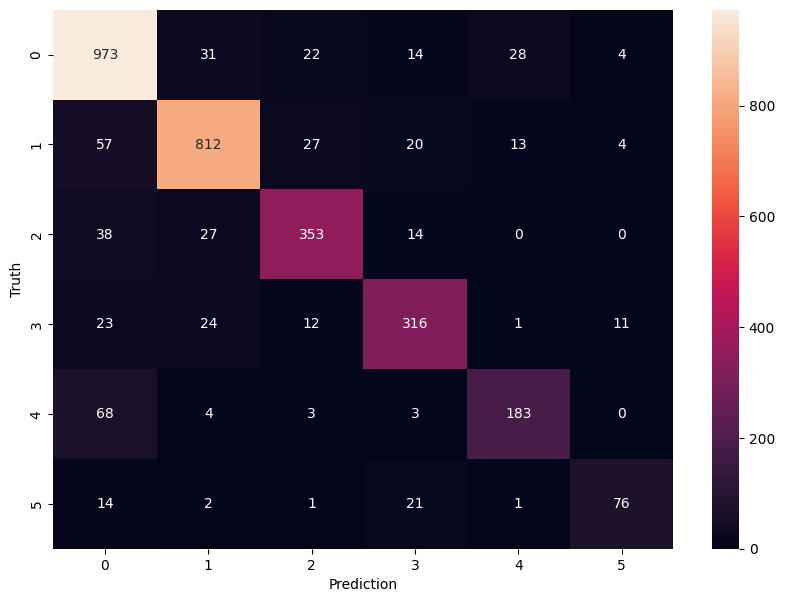

In [81]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')